# Laboratorio 2 - Inteligencia Artificial 
Fabiola Contreras -
Diego Duarte -
Maria Jose Villafuerte

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import pandas as pd
from sklearn.decomposition import PCA
from PIL import Image


### 1. Simular lanzamientos de una moneda en la computadora 

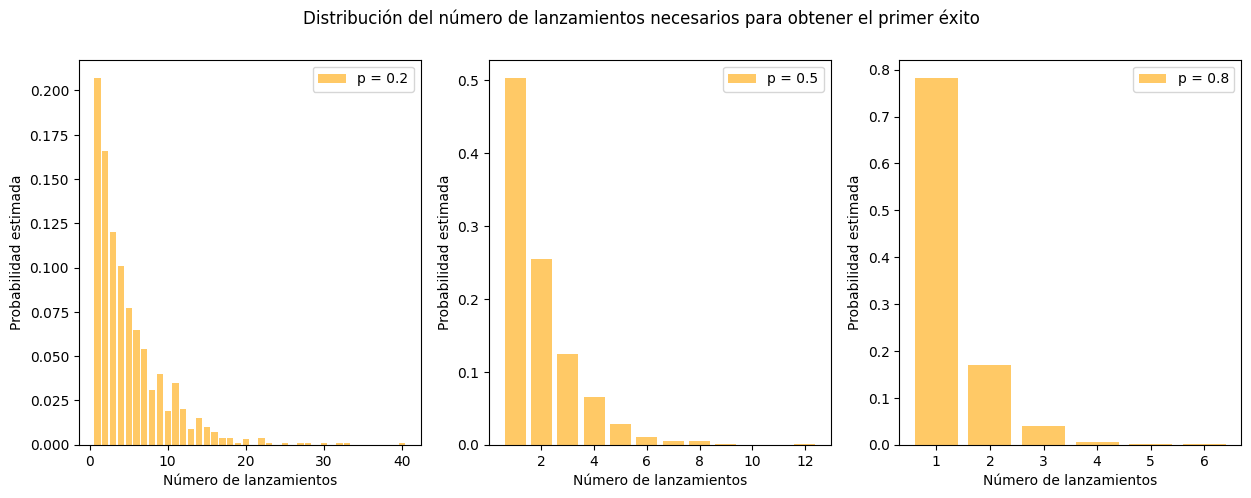

In [45]:
#Simulación de lanzamiento de moneda
def throw_coin(p):
    #Esta función regresa una lista de intentos necesarios para cada simulacion. 
    return np.random.geometric(p, size=1000)

# Graficación de la funcion densidad 
def plot_density(data, p, ax):
    #Regresa la cantidad de los valores unicos que se repitan 
    values, counts = np.unique(data, return_counts=True)
    ax.bar(values, counts / counts.sum(), alpha=0.6, color='orange', label=f"p = {p}")
    ax.set_xlabel("Número de lanzamientos")
    ax.set_ylabel("Probabilidad estimada")
    ax.legend()

# Valores de probabilidad de exito a probar
p_values = [0.2, 0.5, 0.8]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Simulación con diferentes probabilidades
for p, ax in zip(p_values, axes):
    data = throw_coin(p)
    plot_density(data, p, ax)

plt.suptitle("Distribución del número de lanzamientos necesarios para obtener el primer éxito")
plt.show()    

### 2. Comparación de dos muestras


 Geom(p)
KS-statistic: 0.083, p-value: 0.0020287627507189713
KstestResult(statistic=np.float64(0.083), pvalue=np.float64(0.0020287627507189713), statistic_location=np.int32(1), statistic_sign=np.int8(1))


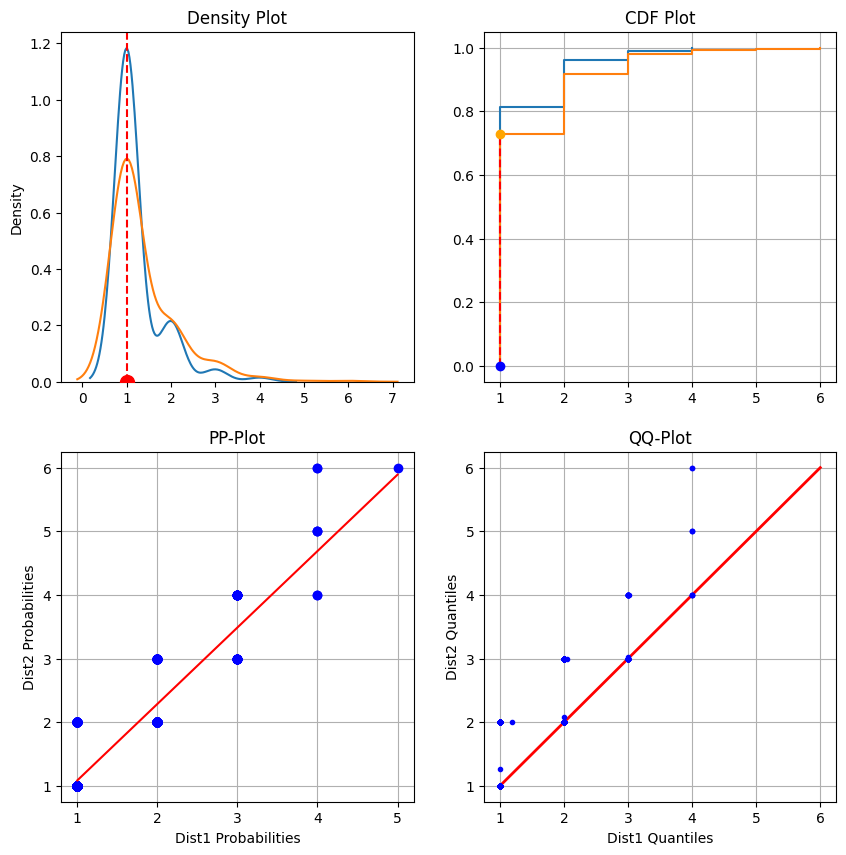


 Geom(q)
KS-statistic: 0.239, p-value: 1.8396077338375514e-25
KstestResult(statistic=np.float64(0.239), pvalue=np.float64(1.8396077338375514e-25), statistic_location=np.int32(1), statistic_sign=np.int8(1))


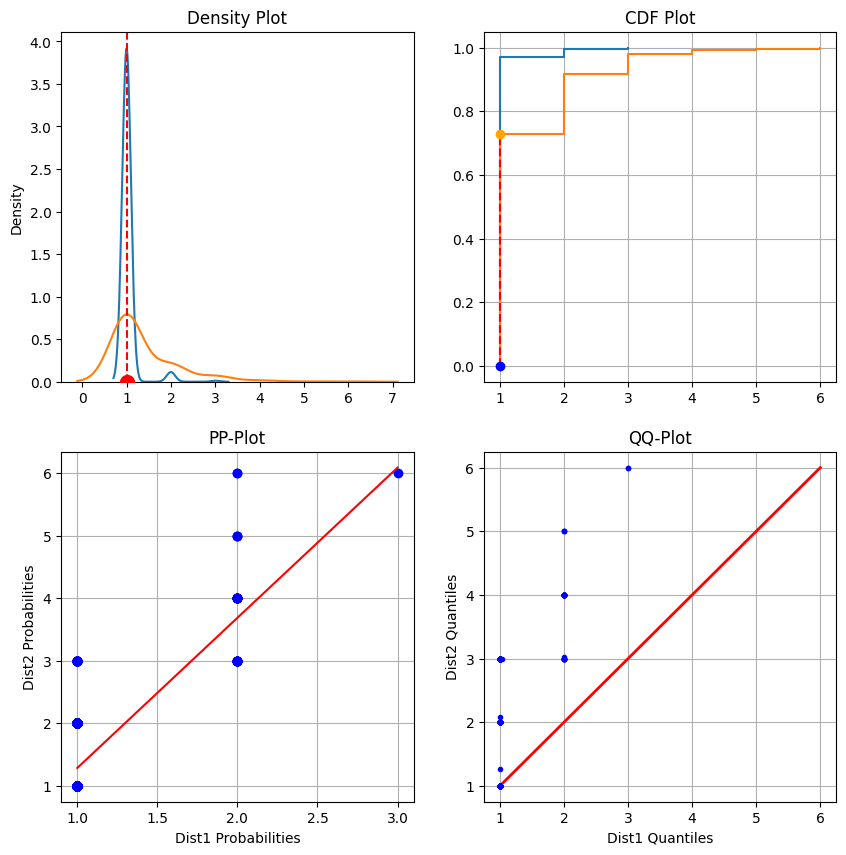

In [46]:
# Función para calcular la ECDF (Función de distribución empírica)
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def compare_samples(data1, data2, p1):
    x1, y1 = ecdf(data1)
    x1 = np.insert(x1, 0, x1[0])
    y1 = np.insert(y1, 0, 0.)
    x2, y2 = ecdf(data2)
    x2 = np.insert(x2, 0, x2[0])
    y2 = np.insert(y2, 0, 0.)

    plt.figure(figsize=(10, 10))

    # Distancia KS
    ks_statistic, p_value = sps.ks_2samp(data1, data2, alternative='two-sided')
    print(f"KS-statistic: {ks_statistic}, p-value: {p_value}")

    # Encontrar el punto donde la diferencia es máxima
    # Interpolamos y2 a la misma longitud de y1 (para comparar correctamente)
    from scipy.interpolate import interp1d
    interp_y2 = interp1d(x2, y2, kind='previous', bounds_error=False, fill_value=(0, 1))
    y2_interp = interp_y2(x1)  # Obtener valores de y2 en los mismos puntos que x1

    # Determinar el índice donde ocurre la distancia máxima
    idx = np.argmax(np.abs(y1 - y2_interp))
    ks_x = x1[idx]  # Punto en X donde ocurre la distancia KS
    ks_y1 = y1[idx]  # Valor de ECDF1 en ese punto
    ks_y2 = y2_interp[idx]  # Valor de ECDF2 en ese punto

    # a) Las funciones de densidad f1 y f2.
    plt.subplot(2,2,1)
    sns.kdeplot(data1, bw_method=0.5, label='dist1')
    sns.kdeplot(data2, bw_method=0.5, label='dist2')
    plt.title('Density Plot')

    # Marcar el punto KS en la densidad
    plt.axvline(ks_x, color='red', linestyle='dashed', label=f'KS @ x={ks_x}')
    plt.scatter([ks_x], [0], color='red', zorder=3, label="KS Point", marker="o", s=100)

    # b) Las funciones de distribución F1 y F2.
    plt.subplot(2,2,2)
    plt.plot(x1, y1, drawstyle='steps-post')
    plt.plot(x2, y2, drawstyle='steps-post')

    # Marcar el punto donde ocurre la distancia KS
    plt.vlines(ks_x, ks_y1, ks_y2, colors='r', linestyle='dashed', label=f'KS = {ks_statistic:.3f}')
    plt.scatter([ks_x], [ks_y1], color='blue', zorder=3)  # Punto en la ECDF1
    plt.scatter([ks_x], [ks_y2], color='orange', zorder=3)  # Punto en la ECDF2

    plt.grid(True)
    plt.title('CDF Plot')

    # c) Una gráfica PP (prob-prob).
    plt.subplot(2,2,3)
    sps.probplot(data2, dist="geom", sparams=(p1,), plot=plt)
    
    plt.grid(True)
    plt.title('PP-Plot')
    plt.xlabel('Dist1 Probabilities')
    plt.ylabel('Dist2 Probabilities') 

    # d) Una gráfica QQ (quantil-quantil).
    plt.subplot(2,2,4)
    qqs = np.linspace(0., 1., 1001)[:-1]
    qq1 = np.quantile(data1, qqs)
    qq2 = np.quantile(data2, qqs)
    minq = min(qq1.min(), qq2.min())
    maxq = max(qq1.max(), qq2.max())
    plt.plot([minq,maxq], [minq,maxq], 'r-', lw=2)
    plt.plot(qq1, qq2, 'b.', drawstyle='steps-post')
    plt.grid(True)
    plt.title('QQ-Plot')
    plt.xlabel('Dist1 Quantiles')
    plt.ylabel('Dist2 Quantiles') 
    
    # Prueba de hipótesis de Kolmogorov-Smirnov
    print(sps.kstest(data1, data2))

    plt.show()

# Comparar la distribución del inciso anterior con muestra aleatoria
# i) Geom(p)
p1 = 0.8
data1 = np.random.geometric(p=p1, size=1000)
data = throw_coin(0.73)
print("\n Geom(p)")
compare_samples(data1, data, p1)

# ii) Geom(q), para q = 1.2p 
# q = 1.2 * 0.8
p1 = 0.96
data2 = np.random.geometric(p=p1, size=1000)
print("\n Geom(q)")
compare_samples(data2, data, p1)



### 3. Ley de Benford 

In [47]:
#Importar datos de área
data_areas = pd.read_csv('./data/areas.csv', sep=';')

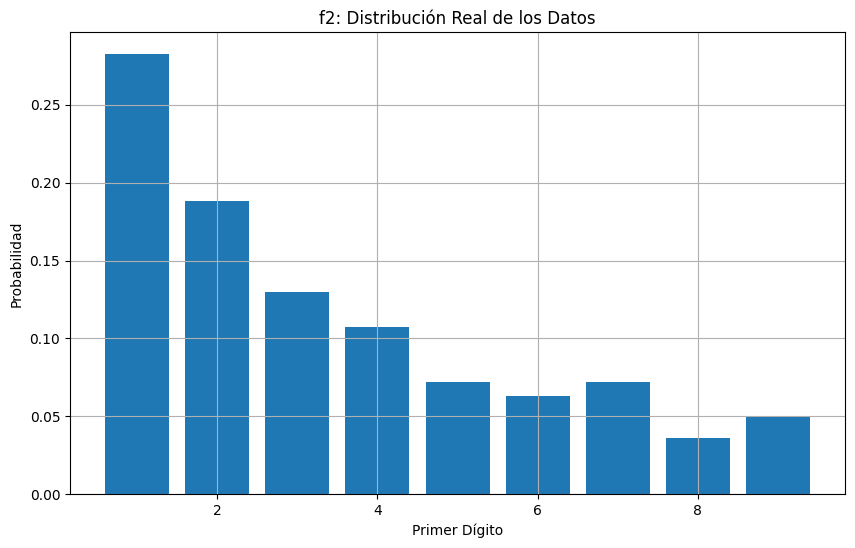

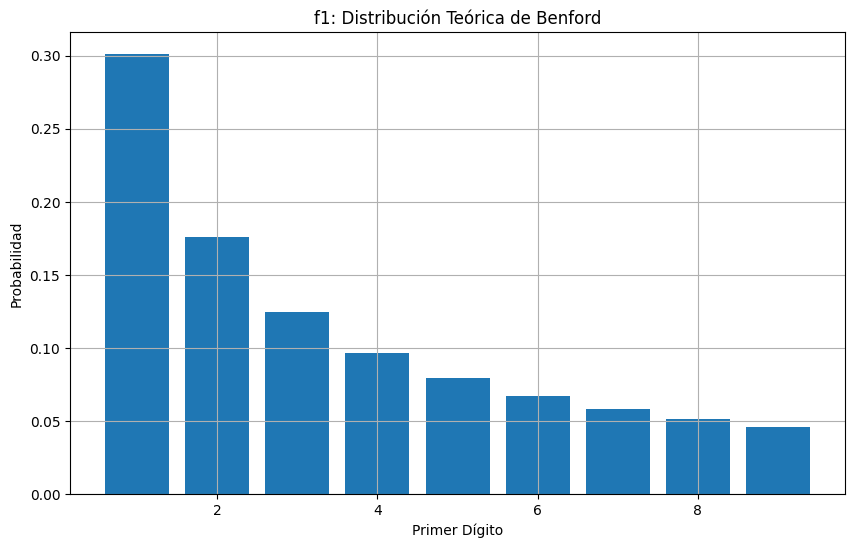

In [48]:
# Obtener gráfica de distribuición de datos para ley de benford con fórmula p(x=d) = Log10(d+1)-log10(d)
# Debe de ser un gráfica con ejes Y porcentaje que se usa la ley obtenido de la fórmula vs número que estamos comparando del 1-9
# f1: Theoretical Benford's Law distribution
digitos = np.arange(1, 10)
distribucion_teorica = np.log10(1 + 1/digitos)

def grafica_f1():
    plt.bar(digitos, distribucion_teorica)
    plt.xlabel('Primer Dígito')
    plt.ylabel('Probabilidad')
    plt.title('f1: Distribución Teórica de Benford')
    plt.grid(True)

# Obtener gráfica de distribuición de datos, haciendo agrupaciones de cuantos datos comienzan con 1-9 y sacando el porcentaje para hacer una grácia de porcentjes vs número 1-9
# f2:  distribution real 
# Descripcion: 
'''
Con el método obtener_primer_digito obtiene el primera numero de un datos
Hacemos es método para todos los datos de la columna, nos queda una lista de los primeros numeros 
Creamos una serie que básicamente guarda el dato de cada dígito con las veces que aparece con .value_counts
Como hasta el momento esta como el conteo de veces que aparece lo dividimos por el conteo total de datos y obtenemos porcentaje
'''
# Obtener primer dígito
def obtener_primer_digito(numero):
    return float(str(abs(numero)).strip('0.')[0])

primeros_digitos = data_areas['Area in square kilometres'].apply(obtener_primer_digito)

conteo_valores = pd.Series(primeros_digitos).value_counts().sort_index()
distribucion_real = conteo_valores / len(primeros_digitos)

def grafica_f2():
    plt.bar(distribucion_real.index, distribucion_real.values)
    plt.xlabel('Primer Dígito')
    plt.ylabel('Probabilidad')
    plt.title('f2: Distribución Real de los Datos')
    plt.grid(True)

    
plt.figure(figsize=(10, 6))
grafica_f2()
plt.figure(figsize=(10, 6))
grafica_f1()


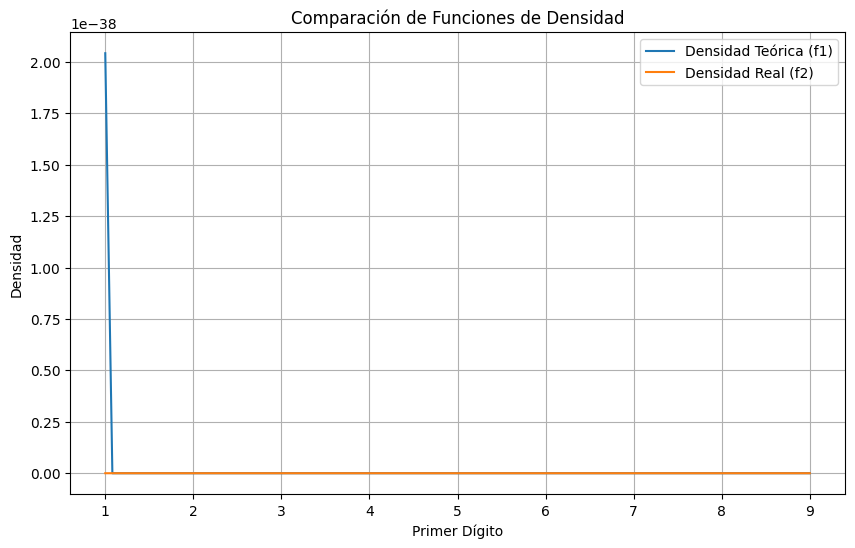

In [49]:
# Funciones de densidad
def funciones_densidad():
    # f1 (teórica)
    x1 = np.linspace(1, 9, 100)
    densidad_f1 = sps.gaussian_kde(distribucion_teorica)

    # f2 (real)
    densidad_f2 = sps.gaussian_kde(distribucion_real)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x1, densidad_f1(x1), label='Densidad Teórica (f1)')
    plt.plot(x1, densidad_f2(x1), label='Densidad Real (f2)')
    plt.xlabel('Primer Dígito')
    plt.ylabel('Densidad')
    plt.title('Comparación de Funciones de Densidad')
    plt.legend()
    plt.grid(True)

funciones_densidad()

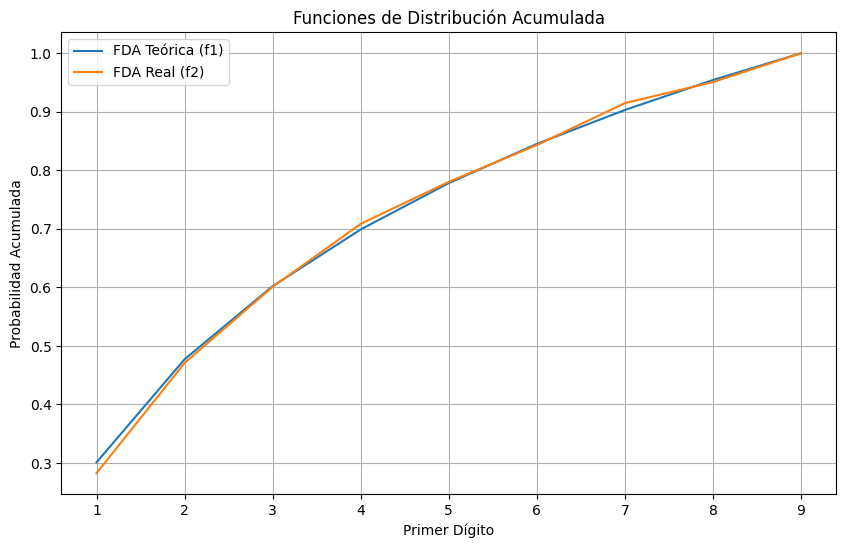

In [50]:
# Funciones de distribución
def funciones_distribucion():
    # f1 (teórica)
    acumulada_f1 = np.cumsum(distribucion_teorica)
    
    # f2 (real)
    acumulada_f2 = np.cumsum(distribucion_real)
    
    plt.figure(figsize=(10, 6))
    plt.plot(digitos, acumulada_f1, label='FDA Teórica (f1)')
    plt.plot(distribucion_real.index, acumulada_f2, label='FDA Real (f2)')
    plt.xlabel('Primer Dígito')
    plt.ylabel('Probabilidad Acumulada')
    plt.title('Funciones de Distribución Acumulada')
    plt.legend()
    plt.grid(True)
    
funciones_distribucion()

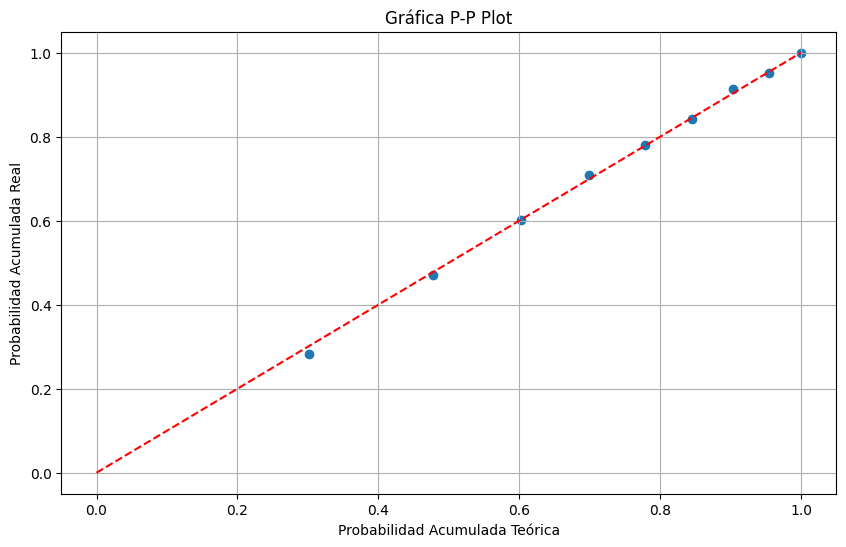

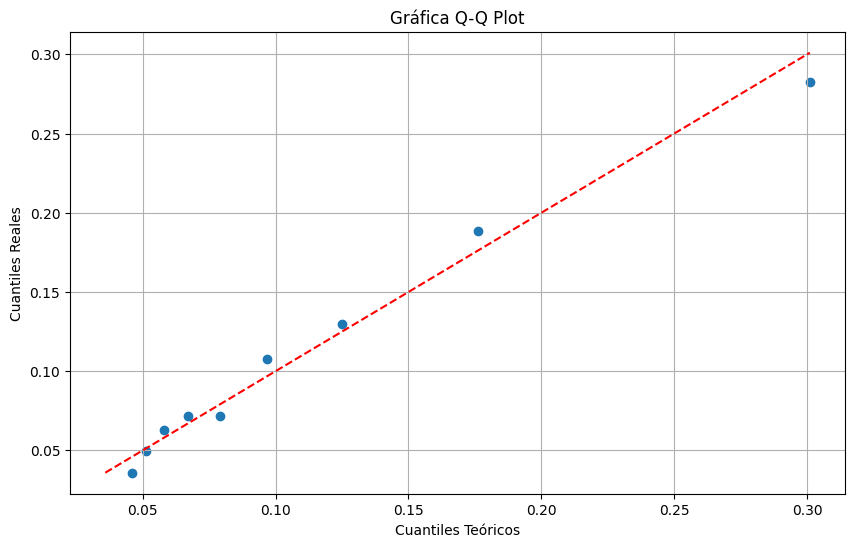

In [51]:
# Gráfica PP Plot
def grafica_pp():
    #Cualcular probabilidades acumulativas
    acumulada_teorica = np.cumsum(distribucion_teorica)
    acumulada_real = np.cumsum(distribucion_real)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(acumulada_teorica, acumulada_real)
    plt.plot([0, 1], [0, 1], 'r--') 
    plt.xlabel('Probabilidad Acumulada Teórica')
    plt.ylabel('Probabilidad Acumulada Real')
    plt.title('Gráfica P-P Plot')
    plt.grid(True)

# Gráfica QQ
def grafica_qq():
    #Optener cuantiles
    cuantiles_teoricos = np.quantile(distribucion_teorica, np.linspace(0, 1, len(distribucion_teorica)))
    cuantiles_reales = np.quantile(distribucion_real, np.linspace(0, 1, len(distribucion_real)))
    
    plt.figure(figsize=(10, 6))
    plt.scatter(cuantiles_teoricos, cuantiles_reales)
    
    #líneas de referencia 
    valor_min = min(cuantiles_teoricos.min(), cuantiles_reales.min())
    valor_max = max(cuantiles_teoricos.max(), cuantiles_reales.max())
    plt.plot([valor_min, valor_max], [valor_min, valor_max], 'r--')
    
    plt.xlabel('Cuantiles Teóricos')
    plt.ylabel('Cuantiles Reales')
    plt.title('Gráfica Q-Q Plot')
    plt.grid(True)

grafica_pp()
grafica_qq()


In [52]:
# Prueba de Kolmogorov-Smirnov
def prueba_kolmogorov_smirnov():
    # Preparar datos para la prueba KS
    datos_teoricos = np.repeat(np.arange(1, 10), (distribucion_teorica   * 1000).astype(int))
    datos_reales = primeros_digitos
    
    # Realizar prueba KS
    estadistico_ks, valor_p = sps.ks_2samp(datos_teoricos, datos_reales)
    
    print("\nResultados de la Prueba Kolmogorov-Smirnov:")
    print(f"Estadístico KS: {estadistico_ks:.4f}")
    print(f"Valor p: {valor_p:.4f}")
    print("\nInterpretación:")
    print("Hipótesis nula: Las dos muestras provienen de la misma distribución")
    if valor_p < 0.05:
        print("Resultado: Como valor p < 0.05, rechazamos la hipótesis nula")
        print("Los datos no siguen la Ley de Benford")
    else:
        print("Resultado: Como valor p >= 0.05, aceptamos la hipótesis nula")
        print("Los datos parecen seguir la Ley de Benford")

prueba_kolmogorov_smirnov()


Resultados de la Prueba Kolmogorov-Smirnov:
Estadístico KS: 0.0200
Valor p: 1.0000

Interpretación:
Hipótesis nula: Las dos muestras provienen de la misma distribución
Resultado: Como valor p >= 0.05, aceptamos la hipótesis nula
Los datos parecen seguir la Ley de Benford


#### Conclusiones
a. La distribución de los primeros dígitos de las áreas de los países sigue la Ley de Benford de manera significativa, lo cual se confirma por el alto valor p (1.0000) en la prueba de Kolmogorov-Smirnov y la similitud visual entre las distribuciones teórica y real.

b. El patrón descendente característico de la Ley de Benford se mantiene en los datos, donde el dígito 1 aparece con mayor frecuencia (aproximadamente 30%) y hay una disminución gradual hacia los dígitos más altos, lo cual se observa claramente en las gráficas de distribución f1 y f2.

c. La excelente alineación en las gráficas P-P y Q-Q, junto con la superposición casi perfecta de las funciones de distribución acumulativa, demuestra que no solo los datos siguen la ley en general, sino que lo hacen de manera consistente a través de todo el rango de dígitos.



### 4. Distribución gaussiana multivariada 

C:\Users\villa\AppData\Local\Temp\ipykernel_21616\830997112.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Z[:,i], kde=True)


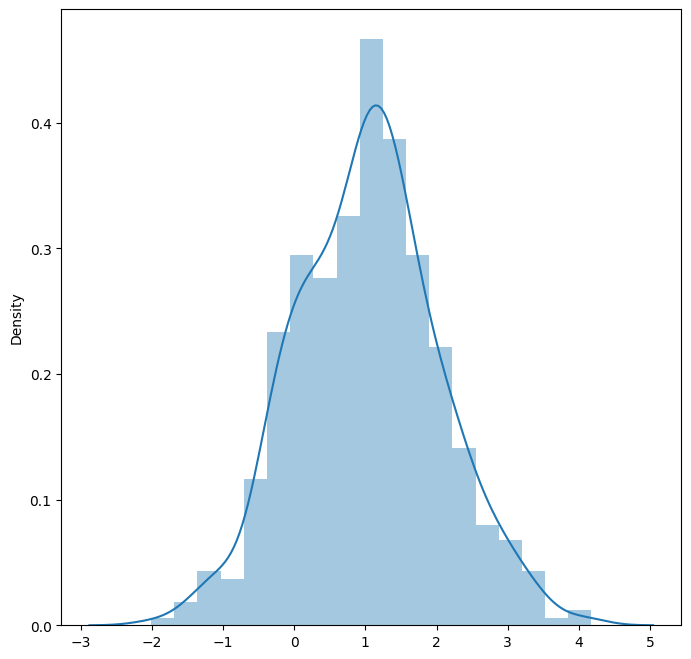

Media teórica:
 [1.]
Media muestral:
 [1.02940379]

Matriz de covarianza teórica:
 [[1.]]
Matriz de covarianza muestral:
 1.0007128700229821


In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parámetros de la distribución
d = int(input("Ingrese la dimensión de la distribución (d ≥ 4): "))

# Solicitar el vector de medias
mu = np.array([float(input(f"Ingrese la media para X{i+1}: ")) for i in range(d)])

# Solicitar la matriz de covarianza
sig0 = np.array([list(map(float, input(f"Ingrese la matriz de covarianza fila por fila (separando valores con espacios) - Fila {i+1}: ").split())) for i in range(d)])


# Generar una muestra aleatoria
Z = np.random.multivariate_normal(mu, sig0, size=500)

plt.figure(figsize=(8,8))
for i in range(0, d):
    for j in range(0, d):
        plt.subplot(d, d, d*i+j+1)
        if (i==j):
            sns.distplot(Z[:,i], kde=True)
        else:
            plt.hist2d(Z[:,j], Z[:,i], bins=(40,40), cmap=plt.cm.jet)
plt.show()

mu_muestra = np.mean(Z, axis=0)
Sigma_muestra = np.cov(Z, rowvar=False)

# Comparar con los valores teóricos
print("Media teórica:\n", mu)
print("Media muestral:\n", mu_muestra)
print("\nMatriz de covarianza teórica:\n", sig0)
print("Matriz de covarianza muestral:\n", Sigma_muestra)


### 5. Comparación de estaciones

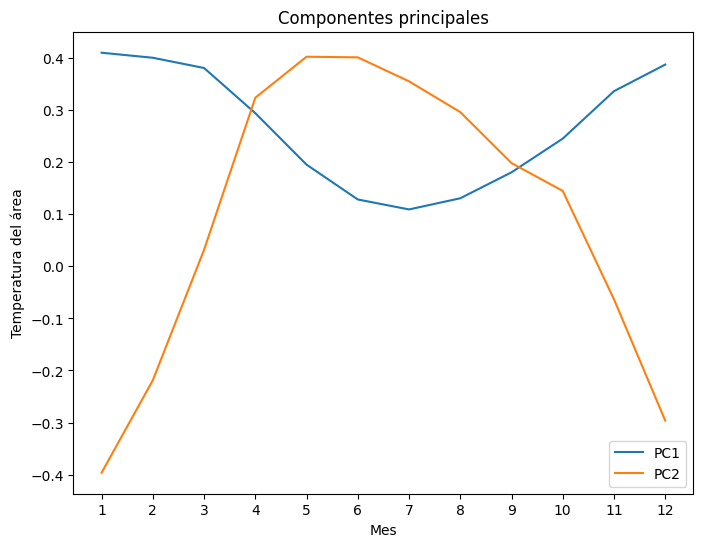

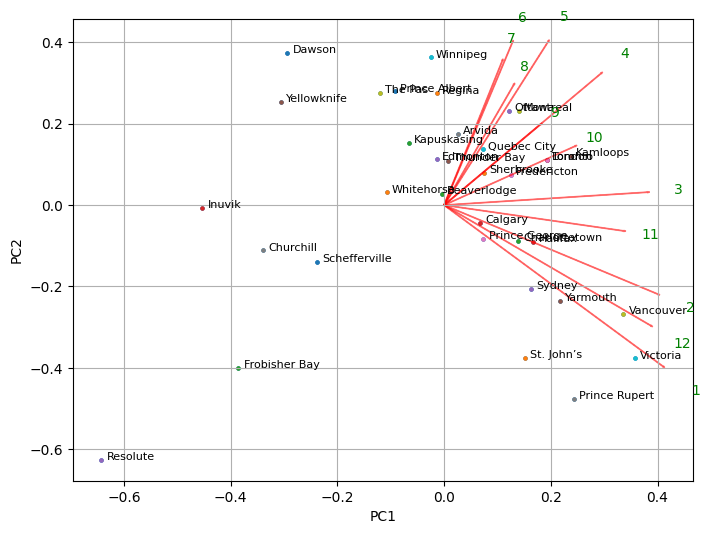

In [54]:
from sklearn.preprocessing import StandardScaler

# Leer los datos
weather_data = pd.read_csv('data/weather.csv', sep=',', header=0)
station_names = weather_data.iloc[:,-1]
data = weather_data.iloc[:,:-1]

# Normalizar los datos
X = weather_data.values[:,:12].astype(np.float32)  # la última columna es el nombre de la estación
X_scaled = StandardScaler().fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=12)
principal_components = pca.fit_transform(X)

# p1 y p2
plt.figure(figsize=(8, 6))
plt.plot(range(1, 13), pca.components_[0], label="PC1")
plt.plot(range(1, 13), pca.components_[1], label="PC2")
plt.xlabel("Mes")
plt.ylabel("Temperatura del área")
plt.title("Componentes principales")
plt.legend()
plt.xticks(range(1, 13))  # Mostrar todos los meses en el eje x
plt.show()

# estaciones en el biplot
def mybiplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    
    for i in range(len(station_names)):
        plt.scatter(xs[i] * scalex, ys[i] * scaley, s=5, label=station_names[i])
        plt.text(xs[i] * scalex + 0.01, ys[i] * scaley, station_names[i], fontsize=8)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(8,6))
mybiplot(principal_components[:, 0:2], np.transpose(pca.components_[0:2, :]))
plt.show()

### 6. Reconstruir imágenes con PCA


In [55]:
#1. Obtener matriz de datos de imagen
def cargar_y_preparar_imagen(ruta_imagen):
    """
    Carga una imagen y la convierte a escala de grises si se especifica
    Retorna una matriz numpy con los valores de píxeles
    """
    img = Image.open(ruta_imagen).convert('L')
    return np.array(img)


In [56]:
def comprimir_imagen_pca(imagen, k):
    """
    Proceso principal de compresión PCA
    Parámetros:
        imagen: matriz numpy de la imagen
        k: número de componentes principales a mantener
    """
    #2. Centralizar y normalizar datos
    media_img = np.mean(imagen)
    X_centrada = imagen - media_img
    
    #3. SVD factorizar los valores (U,S,Vt)
    U, S, Vt = np.linalg.svd(X_centrada, full_matrices=False)
    
    #4. Compresión
    # Usar solo los primeros k componentes
    U_k = U[:, :k]
    S_k = S[:k]
    Vt_k = Vt[:k, :]
    
    #5. Proyectar datos dependiendo de la dimensión K
    comprimida = U_k @ np.diag(S_k) @ Vt_k
    reconstruida = comprimida + media_img
    
    return reconstruida, (U, S, Vt)


In [57]:
# ruta_imagen = "./imagenes/mariposa-monarca.jpg" 
ruta_imagen = "./imagenes/cerezo-japones.jpg" 
# ruta_imagen = "./imagenes/monja_blanca.jpg" 


Cargando imagen...
Dimensiones de imagen original: (375, 600)

Comprimiendo imagen con k=2 componentes...
Dimensiones de imagen reconstruida: (375, 600)

Mostrando resultados...
Cargando imagen...
Dimensiones de imagen original: (375, 600)

Comprimiendo imagen con k=50 componentes...
Dimensiones de imagen reconstruida: (375, 600)

Mostrando resultados...


Text(0.5, 1.0, 'Imagen Reconstruida\n(k=50 componentes)')

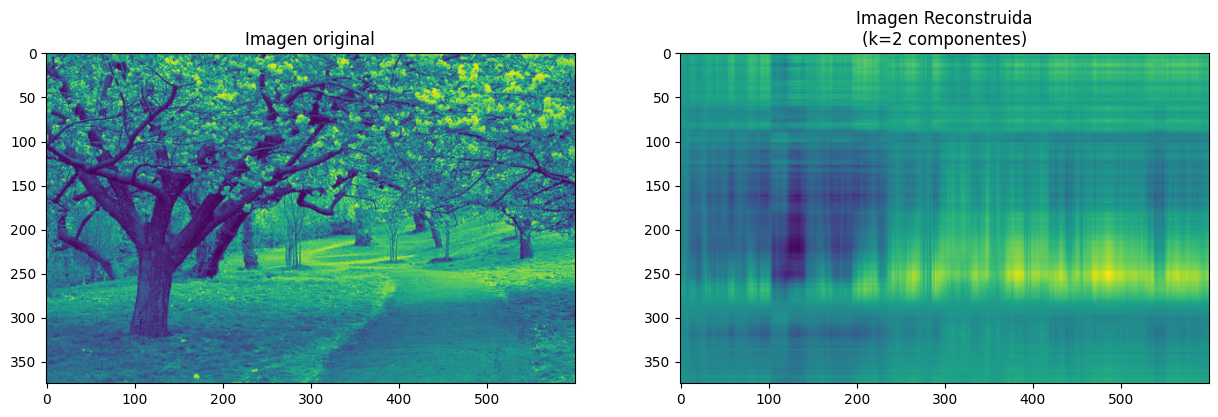

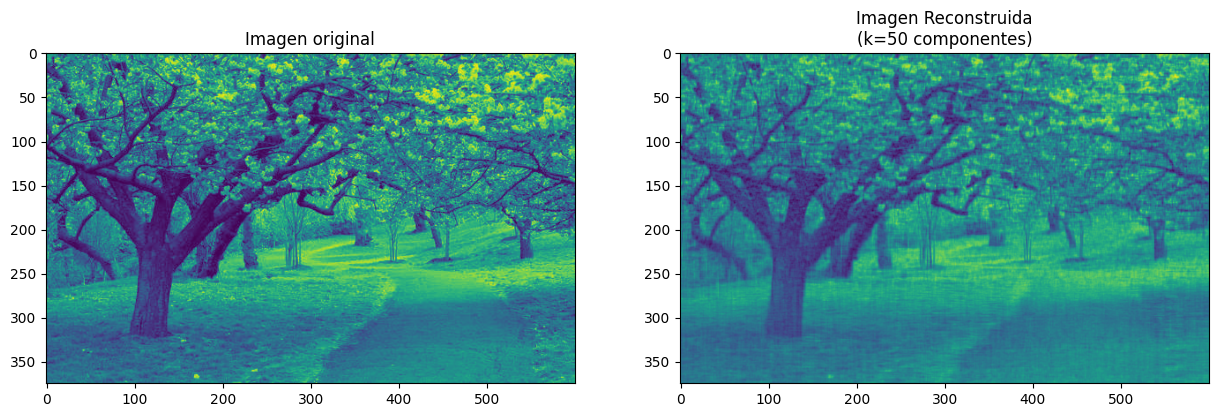

In [60]:
k = 2  # Número de componentes principales a mantener

# Cargar y preparar imagen
print("Cargando imagen...")
original = cargar_y_preparar_imagen(ruta_imagen)
print(f"Dimensiones de imagen original: {original.shape}")

# Realizar compresión
print(f"\nComprimiendo imagen con k={k} componentes...")
reconstruida, (U, S, Vt) = comprimir_imagen_pca(original, k)
print(f"Dimensiones de imagen reconstruida: {reconstruida.shape}")


# Visualizar resultados
print("\nMostrando resultados...")
plt.figure(figsize=(15, 5))

# Imagen original
plt.subplot(121)
plt.imshow(original)
plt.title('Imagen original')

# Imagen reconstruida
plt.subplot(122)
plt.imshow(reconstruida)
plt.title(f'Imagen Reconstruida\n(k={k} componentes)')


k = 50  # Número de componentes principales a mantener

# Cargar y preparar imagen
print("Cargando imagen...")
original = cargar_y_preparar_imagen(ruta_imagen)
print(f"Dimensiones de imagen original: {original.shape}")

# Realizar compresión
print(f"\nComprimiendo imagen con k={k} componentes...")
reconstruida, (U, S, Vt) = comprimir_imagen_pca(original, k)
print(f"Dimensiones de imagen reconstruida: {reconstruida.shape}")


# Visualizar resultados
print("\nMostrando resultados...")
plt.figure(figsize=(15, 5))

# Imagen original
plt.subplot(121)
plt.imshow(original)
plt.title('Imagen original')

# Imagen reconstruida
plt.subplot(122)
plt.imshow(reconstruida)
plt.title(f'Imagen Reconstruida\n(k={k} componentes)')

(np.float64(-0.5), np.float64(599.5), np.float64(374.5), np.float64(-0.5))

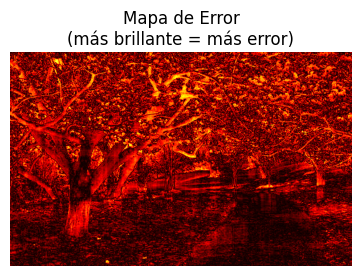

In [59]:
# Mapa de error
plt.figure(figsize=(15, 5))
plt.subplot(133)
error_map = np.abs(original - reconstruida)
plt.imshow(error_map, cmap='hot')
plt.title('Mapa de Error\n(más brillante = más error)')
plt.axis('off')